# A company has customer data that contains 8 columns of customer details and another table having name customer_policy data contains the policy details of the customer. 

# The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team to get some information. Hence, following tasks DS team decided to perform:

# 1. Add the column names to both dataset.

# i. Column Name for customer details table:

           customer_id, 

           Gender,

           age, 

           driving licence present,

           region code, 

           previously insured, 

           vehicle age 

           and vehicle damage, in respective order. 

# ii. Column Name for customer_policy table:

           customer_id, 

           annual premium (in Rs), 

           sales channel code, 

           vintage and response. 

In [1]:
# i) Customer Details Table

import pandas as pd

customer_details = pd.read_csv(r"C:\Users\GANESH KUMAR\Downloads\customer_details.csv")

customer_details.head()

,0,1,2,3,4,5,6,7
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [2]:
customer_details.columns = ['customer_id', 'Gender', 'age', 'driving licence present', 'region code', 'previously insured', 'vehicle age', 'vehicle damage']

In [3]:
customer_details.tail()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes
381108,381109.0,Male,46.0,1.0,29.0,0.0,1-2 Year,No


In [4]:
# ii) customer policy data

customer_policy = pd.read_csv(r"C:\Users\GANESH KUMAR\Downloads\customer_policy_details.csv")

customer_policy.head()

,0,1,2,3,4
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [5]:
customer_policy.columns = ['customer_id', 'annual premium (in Rs)', 'sales channel code', 'vintage', 'response']

In [6]:
customer_policy.tail()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0
381108,381109.0,41777.0,26.0,237.0,0.0


In [7]:
customer_details.describe()

,customer_id,age,driving licence present,region code,previously insured
count,380723.000000,380741.000000,380716.000000,380717.000000,380728.000000
mean,190548.776244,38.822827,0.997867,26.388575,0.458246
std,110016.805160,15.512120,0.046133,13.230361,0.498254
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [8]:
customer_details.shape

(381109, 8)

In [9]:
customer_policy.describe()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
count,380722.000000,380763.000000,380709.000000,380721.000000,380748.000000
mean,190547.491663,30563.700273,112.035752,154.342437,0.122543
std,110013.824148,17200.257877,54.204942,83.669600,0.327912
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24406.000000,29.000000,82.000000,0.000000
50%,190536.500000,31668.000000,133.000000,154.000000,0.000000
75%,285818.750000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


In [10]:
customer_policy.shape

(381109, 5)

# 2. Checking and Cleaning Data Quality:

## i. Null values

    Generate a summary of count of all the null values column wise
    Drop Null values for customer_id because central tendencies for id’s is not feasible.
    Replace all null values for numeric columns by mean. 
    Replace all null values for Categorical value by mode.

## Firstly we will work on customer_details table.

In [11]:
# i. Null values
# Generate a summary of count of all the null values column wise - Customer_details table.

customer_details.isnull().sum()

customer_id                386
Gender                     368
age                        368
driving licence present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64

In [12]:
for i in customer_details.columns:
    count=0
    for j in customer_details[i].isnull():
        if j == True:
            count +=1 
    print(i,'column contains :',count,'null values!')

customer_id column contains : 386 null values!
Gender column contains : 368 null values!
age column contains : 368 null values!
driving licence present column contains : 393 null values!
region code column contains : 392 null values!
previously insured column contains : 381 null values!
vehicle age column contains : 381 null values!
vehicle damage column contains : 407 null values!


In [13]:
# Drop Null values for customer_id because central tendencies for id’s is not feasible.

customer_details.dropna(subset=['customer_id'],axis=0,inplace = True)

In [14]:
customer_details.shape

(380723, 8)

In [15]:
customer_details.reset_index(drop = True, inplace = True)

In [16]:
customer_details

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
380718,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
380719,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
380720,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
380721,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [17]:
# Replace all null values for numeric columns by mean.

## age column in Customer_details table.

age_mean = round(customer_details['age'].mean())

customer_details['age'].fillna(age_mean,inplace = True)

customer_details.isnull().sum()

## region code column in customer_details table

customer_details['region code'].fillna(customer_details['region code'].mean(),inplace = True)

In [18]:
# Replace all null values for Categorical value by mode.

## driving licence present column in customer_details table

customer_details['driving licence present'].fillna(customer_details['driving licence present'].mode()[0],inplace = True)

## previously insured column in customer_details table

customer_details['previously insured'].fillna(customer_details['previously insured'].mode()[0],inplace = True)


In [19]:
customer_details.isnull().sum()

customer_id                  0
Gender                     368
age                          0
driving licence present      0
region code                  0
previously insured           0
vehicle age                381
vehicle damage             406
dtype: int64

## Secondly we will work on customer_policy table

In [20]:
# i) Null values

# Generate a summary of count of all the null values column wise

for i in customer_policy.columns:
    count=0
    for j in customer_policy[i].isnull():
        if j == True:
            count +=1 
    print(i,'column contains :',count,'null values!')

customer_id column contains : 387 null values!
annual premium (in Rs) column contains : 346 null values!
sales channel code column contains : 400 null values!
vintage column contains : 388 null values!
response column contains : 361 null values!


In [21]:
## Drop Null values for customer_id because central tendencies for id’s is not feasible.

customer_policy.dropna(subset=['customer_id'],axis=0,inplace = True)

In [22]:
customer_policy.shape

(380722, 5)

In [23]:
customer_policy.reset_index(drop = True, inplace = True)

In [24]:
customer_policy

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
380717,381105.0,30170.0,26.0,88.0,0.0
380718,381106.0,40016.0,152.0,131.0,0.0
380719,381107.0,35118.0,160.0,161.0,0.0
380720,381108.0,44617.0,124.0,74.0,0.0


In [25]:
# Now we check which columns are catogerical.

customer_policy['annual premium (in Rs)'].value_counts() # Not catogerical

2630.0     64735
69856.0      140
39008.0       41
45179.0       38
38287.0       38
           ...  
50930.0        1
82802.0        1
53276.0        1
66918.0        1
69845.0        1
Name: annual premium (in Rs), Length: 48814, dtype: int64

In [26]:
customer_policy['sales channel code'].value_counts() # Not catogerical

152.0    134523
26.0      79542
124.0     73814
160.0     21738
156.0     10647
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: sales channel code, Length: 155, dtype: int64

In [27]:
customer_policy['vintage'].value_counts() # Not catogerical

256.0    1417
73.0     1406
282.0    1396
187.0    1392
158.0    1391
         ... 
89.0     1233
205.0    1231
32.0     1227
224.0    1225
277.0    1221
Name: vintage, Length: 290, dtype: int64

In [28]:
customer_policy['response'].value_counts() # Catogerical

0.0    333757
1.0     46604
Name: response, dtype: int64

In [29]:
# Replace all null values for numeric columns by mean. 
# Replace all null values for Categorical value by mode.

customer_policy['annual premium (in Rs)'].fillna(customer_policy['annual premium (in Rs)'].mean(), inplace =True)

customer_policy['sales channel code'].fillna(customer_policy['sales channel code'].mean(), inplace =True)

customer_policy['vintage'].fillna(customer_policy['vintage'].mean(), inplace =True)

customer_policy['response'].fillna(customer_policy['response'].mode()[0], inplace =True)

In [30]:
customer_policy.isnull().sum()

customer_id               0
annual premium (in Rs)    0
sales channel code        0
vintage                   0
response                  0
dtype: int64

# 2.Checking and Cleaning Data Quality:

## ii. Outliers

    Generate a summary of count of all the outliers column wise
    Replace all outlier values for numeric columns by mean. 

                                        

In [31]:
# Generate a summary of count of all the outliers column wise

def finding_out(df):
    q1 = df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    outlier = df[(df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))]
    return outlier
outliers = finding_out(customer_details['region code'])
print("Number of outliers:",len(outliers))
print('Maximum outlier value :',outliers.max())
print('Minimum outlier value :',outliers.min())

Number of outliers: 0
Maximum outlier value : nan
Minimum outlier value : nan


In [32]:
outliers = finding_out(customer_details['age'])
print("Number of outliers:",len(outliers))
print('Maximum outlier value :',outliers.max())
print('Minimum outlier value :',outliers.min())

Number of outliers: 0
Maximum outlier value : nan
Minimum outlier value : nan


In [33]:
outliers = finding_out(customer_policy['annual premium (in Rs)'])
print("Number of outliers:",len(outliers))
print('Maximum outlier value :',outliers.max())
print('Minimum outlier value :',outliers.min())

Number of outliers: 10332
Maximum outlier value : 540165.0
Minimum outlier value : 61858.0


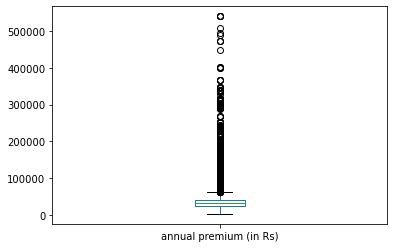

In [34]:
import matplotlib.pyplot as plt
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
    
plot_boxplot(customer_policy,'annual premium (in Rs)')

In [35]:
outliers = finding_out(customer_policy['sales channel code'])
print("Number of outliers:",len(outliers))
print('Maximum outlier value :',outliers.max())
print('Minimum outlier value :',outliers.min())

Number of outliers: 0
Maximum outlier value : nan
Minimum outlier value : nan


In [36]:
outliers = finding_out(customer_policy['vintage'])
print("Number of outliers:",len(outliers))
print('Maximum outlier value :',outliers.max())
print('Minimum outlier value :',outliers.min())

Number of outliers: 0
Maximum outlier value : nan
Minimum outlier value : nan


In [37]:
# Replace all outlier values for numeric columns by mean. 
import numpy as np
def replace_outlier(df):
    q1 = df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    lower_outlier_value = q1-1.5*iqr
    upper_outlier_value = q3+1.5*iqr
    df[((df<lower_outlier_value)|(df>upper_outlier_value))] = np.nan
    df.fillna(df.mean(), inplace = True)
    print(df.describe())
    return plt.boxplot(df)

count    380722.000000
mean      29264.219698
std       14531.278897
min        2630.000000
25%       24416.000000
50%       30949.000000
75%       38335.000000
max       61854.000000
Name: annual premium (in Rs), dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x24084f22eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x24084f30610>,
 'boxes': [<matplotlib.lines.Line2D at 0x24084f22b20>],
 'medians': [<matplotlib.lines.Line2D at 0x24084f30d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x24084f3c100>],
 'means': []}

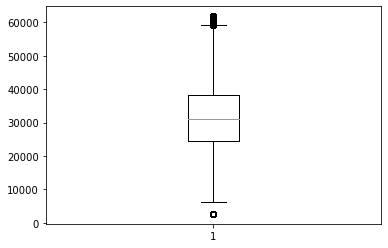

In [38]:
replace_outlier(customer_policy['annual premium (in Rs)'])

# 2.Checking and Cleaning Data Quality:

## iii. White spaces

    Remove white spaces

In [39]:
customer_details.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [40]:
def whitespace_remover(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = df[i].str.strip()
        else:
            pass
    return df

In [41]:
whitespace_remover(customer_details)

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
380718,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
380719,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
380720,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
380721,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [42]:
customer_policy.head()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [43]:
whitespace_remover(customer_policy)

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
380717,381105.0,30170.0,26.0,88.0,0.0
380718,381106.0,40016.0,152.0,131.0,0.0
380719,381107.0,35118.0,160.0,161.0,0.0
380720,381108.0,44617.0,124.0,74.0,0.0


# 2.Checking and Cleaning Data Quality:

## iv. case correction(lower or upper, any one) 

In [44]:
def case_correction(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = df[i].str.upper()
        else:
            pass
    return df

In [45]:
case_correction(customer_details)

# customer_policy dataframe has no object column.

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,YES
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,NO
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,YES
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,NO
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,NO
...,...,...,...,...,...,...,...,...
380718,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 YEAR,NO
380719,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 YEAR,NO
380720,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 YEAR,NO
380721,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 YEARS,YES


# 2.Checking and Cleaning Data Quality:

## v. Convert nominal data (categorical) into dummies 

    for future modeling use if required

In [46]:
# Creating dummy variable for vehicle damage

dummy_variable_1 = pd.get_dummies(customer_details["vehicle damage"]) 

dummy_variable_1.rename(columns = {'NO':'Vehicle damage - No','YES':'Vehicle damage - Yes'}, inplace = True)

In [47]:
# Concating the customer_details and dummy_variable_1

customer_details = pd.concat([customer_details,dummy_variable_1], axis = 1)

customer_details.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage,Vehicle damage - No,Vehicle damage - Yes
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,YES,0,1
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,NO,1,0
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,YES,0,1
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,NO,1,0
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,NO,1,0


In [48]:
# Now we can drop the vehicle damage column.

customer_details.drop('vehicle damage', axis = 1, inplace = True)

In [49]:
customer_details

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,Vehicle damage - No,Vehicle damage - Yes
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,0,1
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,1,0
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,0,1
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,1,0
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,1,0
...,...,...,...,...,...,...,...,...,...
380718,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 YEAR,1,0
380719,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 YEAR,1,0
380720,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 YEAR,1,0
380721,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 YEARS,0,1


# 2.Checking and Cleaning Data Quality:
## vi. Drop Duplicates (duplicated rows)

In [51]:
# customer_details table

customer_details.drop_duplicates(inplace = True)

customer_details

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,Vehicle damage - No,Vehicle damage - Yes
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,0,1
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,1,0
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,0,1
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,1,0
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,1,0
...,...,...,...,...,...,...,...,...,...
380718,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 YEAR,1,0
380719,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 YEAR,1,0
380720,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 YEAR,1,0
380721,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 YEARS,0,1


In [52]:
# customer_policy table

customer_policy.drop_duplicates(inplace = True)

customer_policy

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
380717,381105.0,30170.0,26.0,88.0,0.0
380718,381106.0,40016.0,152.0,131.0,0.0
380719,381107.0,35118.0,160.0,161.0,0.0
380720,381108.0,44617.0,124.0,74.0,0.0


# 3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.

# (Hint: use pd.merge() function)

In [54]:
customer_master = pd.merge(customer_details,customer_policy, on = 'customer_id')

customer_master

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,Vehicle damage - No,Vehicle damage - Yes,annual premium (in Rs),sales channel code,vintage,response
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,0,1,40454.0,26.0,217.0,1.0
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,1,0,33536.0,26.0,183.0,0.0
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,0,1,38294.0,26.0,27.0,1.0
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,1,0,28619.0,152.0,203.0,0.0
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,1,0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 YEAR,1,0,30170.0,26.0,88.0,0.0
380332,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 YEAR,1,0,40016.0,152.0,131.0,0.0
380333,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 YEAR,1,0,35118.0,160.0,161.0,0.0
380334,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 YEARS,0,1,44617.0,124.0,74.0,0.0


# 4. Company needs some important information from the master table to make decisions for future growth.They needs following information:
    i. Gender wise average annual premium

In [64]:
Gender_wise_average_annual_premium = customer_master.groupby('Gender')['annual premium (in Rs)'].mean()

In [65]:
Gender_wise_average_annual_premium

Gender
FEMALE    29239.624915
MALE      29286.550012
Name: annual premium (in Rs), dtype: float64

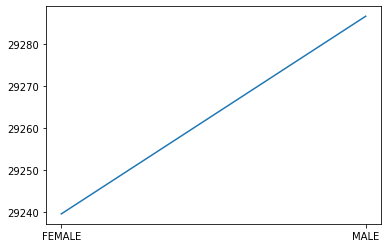

In [67]:
plt.plot(Gender_wise_average_annual_premium)

<AxesSubplot:title={'center':'Gender vs annual premium (in Rs)'}, xlabel='Gender'>

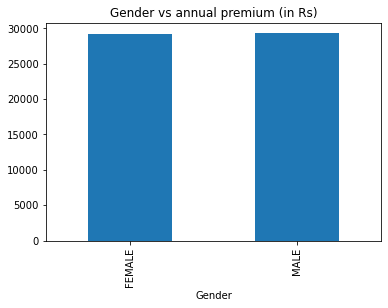

In [72]:
Gender_wise_average_annual_premium.plot.bar(title = 'Gender vs annual premium (in Rs)')

# 4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

# ii. Age wise average annual premium

In [73]:
Age_wise_average_annual_premium = customer_master.groupby('age')['annual premium (in Rs)'].mean()

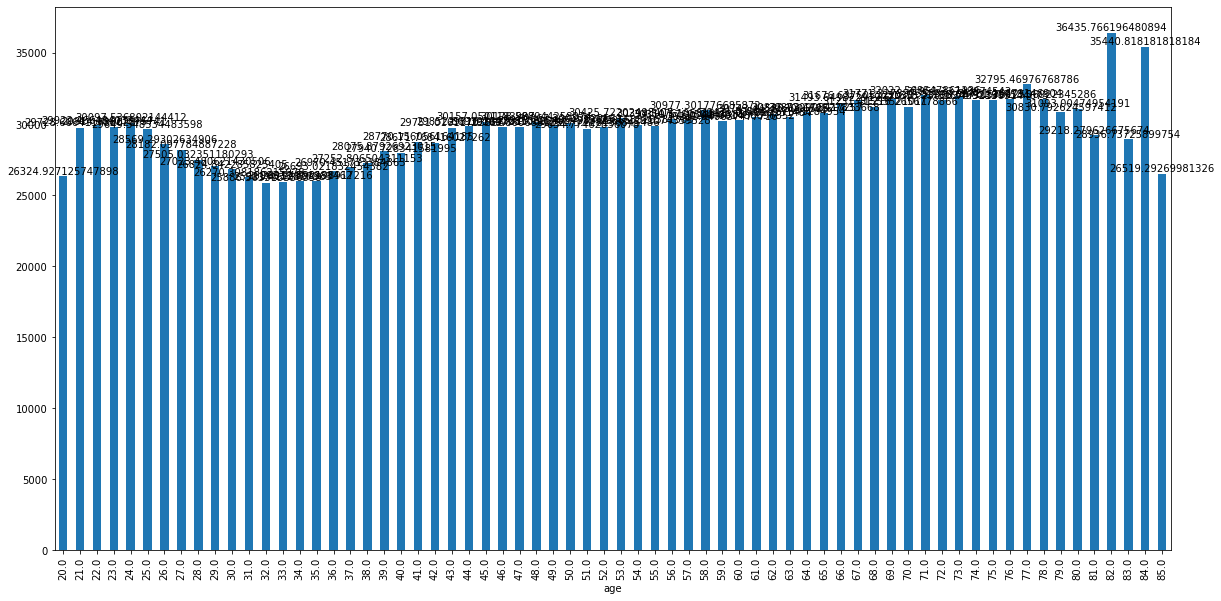

In [87]:
plt.figure(figsize = (20,10))
cp = Age_wise_average_annual_premium.plot.bar()
for p in cp.patches:
      cp.annotate(p.get_height(), xy = ((p.get_width()/2)+p.get_x(), p.get_height()), ha = 'center' , va = 'bottom')

# 4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

# iii. Is your data balanced between the genders?

          (Hint: Data is balanced if number of counts in each group is approximately same)



In [82]:
customer_master.groupby('Gender').count()

,customer_id,age,driving licence present,region code,previously insured,vehicle age,Vehicle damage - No,Vehicle damage - Yes,annual premium (in Rs),sales channel code,vintage,response
Gender,,,,,,,,,,,,
FEMALE,174485,174485,174485,174485,174485,174309,174485,174485,174485,174485,174485,174485
MALE,205484,205484,205484,205484,205484,205279,205484,205484,205484,205484,205484,205484


# 5. Company needs some important information from the master table to make decisions for future growth.They needs following information:

# iv. Vehicle age wise average annual premium.

In [83]:
Vehicle_age_wise_average_annual_premium = customer_master.groupby('vehicle age')['annual premium (in Rs)'].mean()

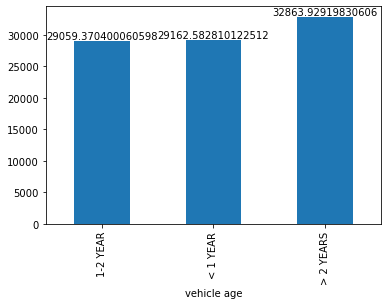

In [86]:
cp = Vehicle_age_wise_average_annual_premium.plot.bar()
for p in cp.patches:
      cp.annotate(p.get_height(), xy = ((p.get_width()/2)+p.get_x(), p.get_height()), ha = 'center' , va = 'bottom')

# 5. Is there any relation between Person Age and annual premium?

Hint: use correlation function (Correlation describes the relationship between two variables). 

Correlation coefficient < -0.5           - Strong negative relationship

Correlation coefficient > 0.5            -  Strong positive relationship

0.5 < Correlation coefficient < 0.5   - There is no relationship. 

In [95]:
customer_master.corr()

,customer_id,age,driving licence present,region code,previously insured,Vehicle damage - No,Vehicle damage - Yes,annual premium (in Rs),sales channel code,vintage,response
customer_id,1.000000,0.001667,-0.000476,-0.000713,0.002464,0.001523,-0.001436,0.002927,-0.002921,-0.000602,-0.001359
age,0.001667,1.000000,-0.079625,0.042504,-0.254279,-0.267096,0.267130,0.049807,-0.577341,-0.001219,0.111092
driving licence present,-0.000476,-0.079625,1.000000,-0.001069,0.014905,0.016543,-0.016641,-0.009962,0.043839,-0.000852,0.010310
region code,-0.000713,0.042504,-0.001069,1.000000,-0.024626,-0.027959,0.028062,-0.002400,-0.042387,-0.002757,0.010441
previously insured,0.002464,-0.254279,0.014905,-0.024626,1.000000,0.822604,-0.822610,0.014063,0.218978,0.002407,-0.340680
Vehicle damage - No,0.001523,-0.267096,0.016543,-0.027959,0.822604,1.000000,-0.997867,-0.000405,0.223880,0.001907,-0.353812
Vehicle damage - Yes,-0.001436,0.267130,-0.016641,0.028062,-0.822610,-0.997867,1.000000,0.000480,-0.223891,-0.001959,0.353768
annual premium (in Rs),0.002927,0.049807,-0.009962,-0.002400,0.014063,-0.000405,0.000480,1.000000,-0.105319,-0.000981,0.018061
sales channel code,-0.002921,-0.577341,0.043839,-0.042387,0.218978,0.223880,-0.223891,-0.105319,1.000000,-0.000151,-0.138928
vintage,-0.000602,-0.001219,-0.000852,-0.002757,0.002407,0.001907,-0.001959,-0.000981,-0.000151,1.000000,-0.001085


In [97]:
customer_master[['age','annual premium (in Rs)']].corr()

,age,annual premium (in Rs)
age,1.000000,0.049807
annual premium (in Rs),0.049807,1.000000


### From the above correlation function we can conclude that,

                - The correlation coeffecient for age and annual premium lies between 0.5 to -0.5, so we can say that there is no relationship between two variables. The variables donot affect each other.